In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import time
from lightgbm import LGBMClassifier
import lightgbm as lgb

pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv("IBRD_Statement_Of_Loans_-_Historical_Data_20240420.csv")

C:\Users\phat0\AppData\Local\Temp\ipykernel_19232\4262202198.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("IBRD_Statement_Of_Loans_-_Historical_Data_20240420.csv")


In [3]:
df.shape

(1305480, 33)

In [4]:
df.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Interest Rate,Currency of Commitment,Project ID,Project Name,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,05/31/2022 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,4.25,NaN,P037383,RECONSTRUCTION,2.500000e+08,0.0,0.0,2.500000e+08,3.800000e+04,0.0,0.00,0.00,2.499620e+08,2.499620e+08,0.0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
1,05/31/2022 12:00:00 AM,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,1.910442e+08,0.0,0.0,1.910442e+08,1.033722e+08,0.0,0.00,0.00,8.767200e+07,8.767200e+07,0.0,0.0,04/01/1952 12:00:00 AM,10/01/1972 12:00:00 AM,08/07/1947 12:00:00 AM,08/07/1947 12:00:00 AM,09/11/1947 12:00:00 AM,03/31/1948 12:00:00 AM,NaN
2,05/31/2022 12:00:00 AM,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037452,RECONSTRUCTION,3.955788e+06,0.0,0.0,3.955788e+06,0.000000e+00,0.0,0.00,0.00,3.955788e+06,3.955788e+06,0.0,0.0,04/01/1953 12:00:00 AM,04/01/1954 12:00:00 AM,05/25/1948 12:00:00 AM,08/07/1947 12:00:00 AM,06/01/1948 12:00:00 AM,06/30/1948 12:00:00 AM,NaN
3,05/31/2022 12:00:00 AM,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037362,RECONSTRUCTION,4.000000e+07,0.0,0.0,4.000000e+07,1.777100e+07,0.0,0.00,0.00,2.222900e+07,2.222900e+07,0.0,0.0,02/01/1953 12:00:00 AM,08/01/1972 12:00:00 AM,08/22/1947 12:00:00 AM,08/22/1947 12:00:00 AM,10/17/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN
4,05/31/2022 12:00:00 AM,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,4.25,NaN,P037451,RECONSTRUCTION,1.200000e+07,0.0,0.0,1.176198e+07,1.619983e+06,0.0,0.01,0.01,1.014200e+07,1.014200e+07,0.0,0.0,07/15/1949 12:00:00 AM,07/15/1972 12:00:00 AM,08/28/1947 12:00:00 AM,08/28/1947 12:00:00 AM,10/24/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305480 entries, 0 to 1305479
Data columns (total 33 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   End of Period                 1305480 non-null  object 
 1   Loan Number                   1305480 non-null  object 
 2   Region                        1305480 non-null  object 
 3   Country Code                  1305166 non-null  object 
 4   Country                       1305480 non-null  object 
 5   Borrower                      1296472 non-null  object 
 6   Guarantor Country Code        1256995 non-null  object 
 7   Guarantor                     1230641 non-null  object 
 8   Loan Type                     1305480 non-null  object 
 9   Loan Status                   1305480 non-null  object 
 10  Interest Rate                 1274942 non-null  float64
 11  Currency of Commitment        0 non-null        float64
 12  Project ID                  

In [6]:
df.describe()

,Interest Rate,Currency of Commitment,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,Sold 3rd Party,Repaid 3rd Party,Due 3rd Party,Loans Held
count,1.274942e+06,0.0,1.305480e+06,1.305480e+06,1.305480e+06,1.305480e+06,1.305480e+06,1.305480e+06,1.305480e+06,1.305480e+06,1.305480e+06,1.305480e+06,1.305480e+06,1.305480e+06
mean,4.410103e+00,NaN,8.406012e+07,1.033722e+07,8.124376e+06,6.548623e+07,4.269593e+07,2.244922e+07,-3.811974e+05,2.206803e+07,4.448950e+05,4.448950e+05,-5.444741e-15,3.057360e+07
std,3.374830e+00,NaN,1.555093e+08,4.689500e+07,5.176101e+07,1.362332e+08,9.202471e+07,1.003264e+08,1.132254e+07,9.679748e+07,3.870415e+06,3.870415e+06,1.019130e-11,1.175933e+08
min,0.000000e+00,NaN,0.000000e+00,0.000000e+00,-1.226600e+08,-1.490000e-08,0.000000e+00,-1.483090e+08,-1.100785e+09,-2.300000e-01,0.000000e+00,0.000000e+00,-3.730000e-09,-1.483090e+08
25%,3.300000e-01,NaN,1.205344e+07,0.000000e+00,0.000000e+00,6.717200e+06,2.880000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.310000e+00,NaN,3.300000e+07,2.410600e+02,0.000000e+00,2.326776e+07,1.503942e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.250000e+00,NaN,9.800000e+07,3.774256e+06,0.000000e+00,6.863864e+07,4.499933e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+01,NaN,3.750000e+09,1.995000e+09,3.379011e+09,3.153531e+09,3.000000e+09,2.923282e+09,5.065767e+08,2.842924e+09,2.499620e+08,2.499620e+08,3.730000e-09,3.750000e+09


In [7]:
# Thống kê phần trăm giá trị rỗng
for col in df.columns:
    if df[col].isnull().sum() != 0:
        missing_percentage = round(df[col].isnull().sum() / df.shape[0] * 100, 4)
        print(col + ": " + str(missing_percentage))

Country Code: 0.0241
Borrower: 0.69
Guarantor Country Code: 3.714
Guarantor: 5.7327
Interest Rate: 2.3392
Currency of Commitment: 100.0
Project ID: 0.0032
Project Name : 12.1882
First Repayment Date: 0.3051
Last Repayment Date: 0.2931
Agreement Signing Date: 1.449
Board Approval Date: 0.0002
Effective Date (Most Recent): 0.7675
Closed Date (Most Recent): 0.0945
Last Disbursement Date: 40.8504


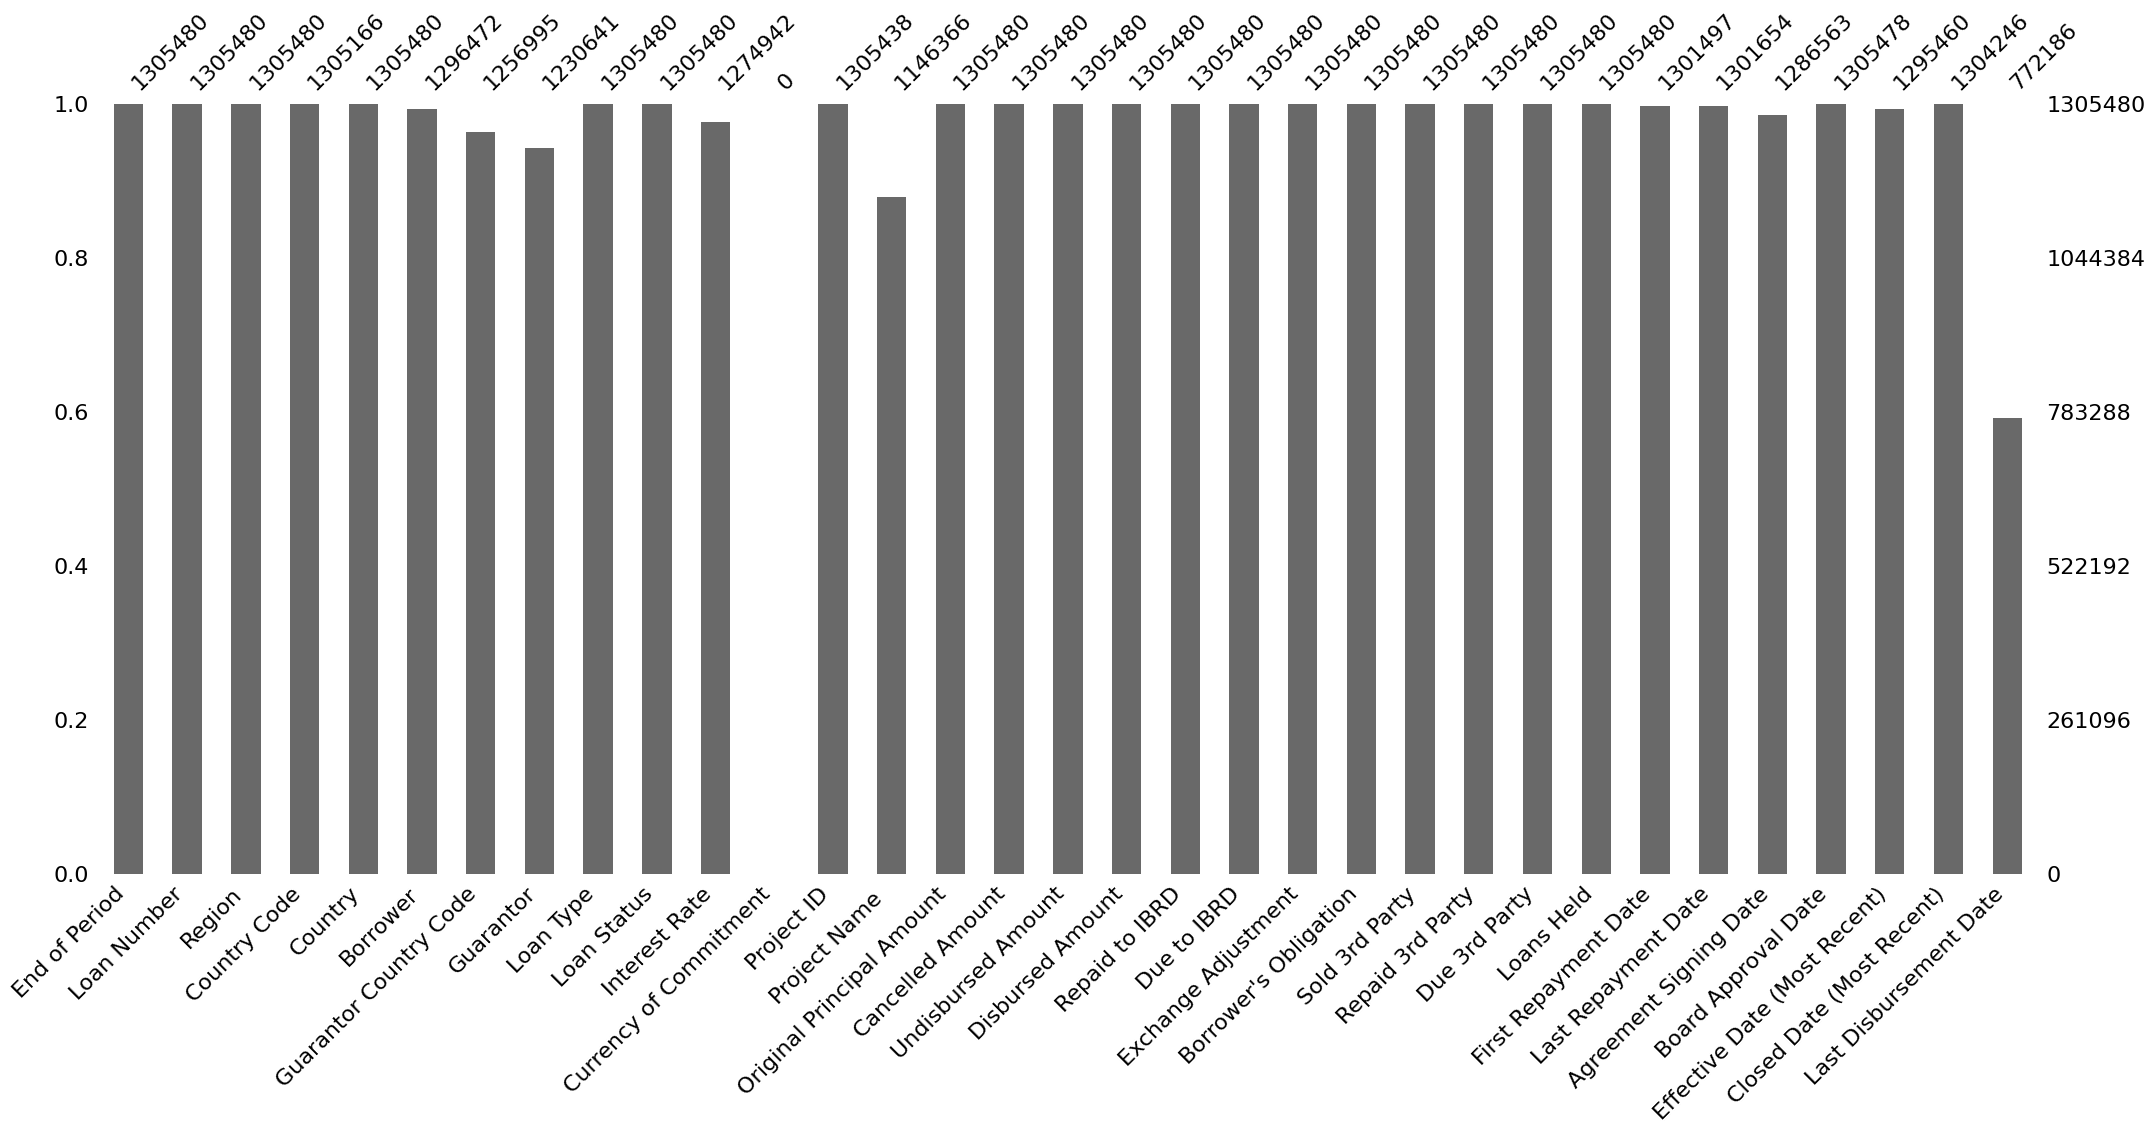

In [8]:
msno.bar(df)
plt.savefig("Visualize of missing data.png", bbox_inches='tight')
plt.show()

Nhìn hình ta thấy Currency of Commitment không hề có dữ liệu nào, cân nhắc bỏ

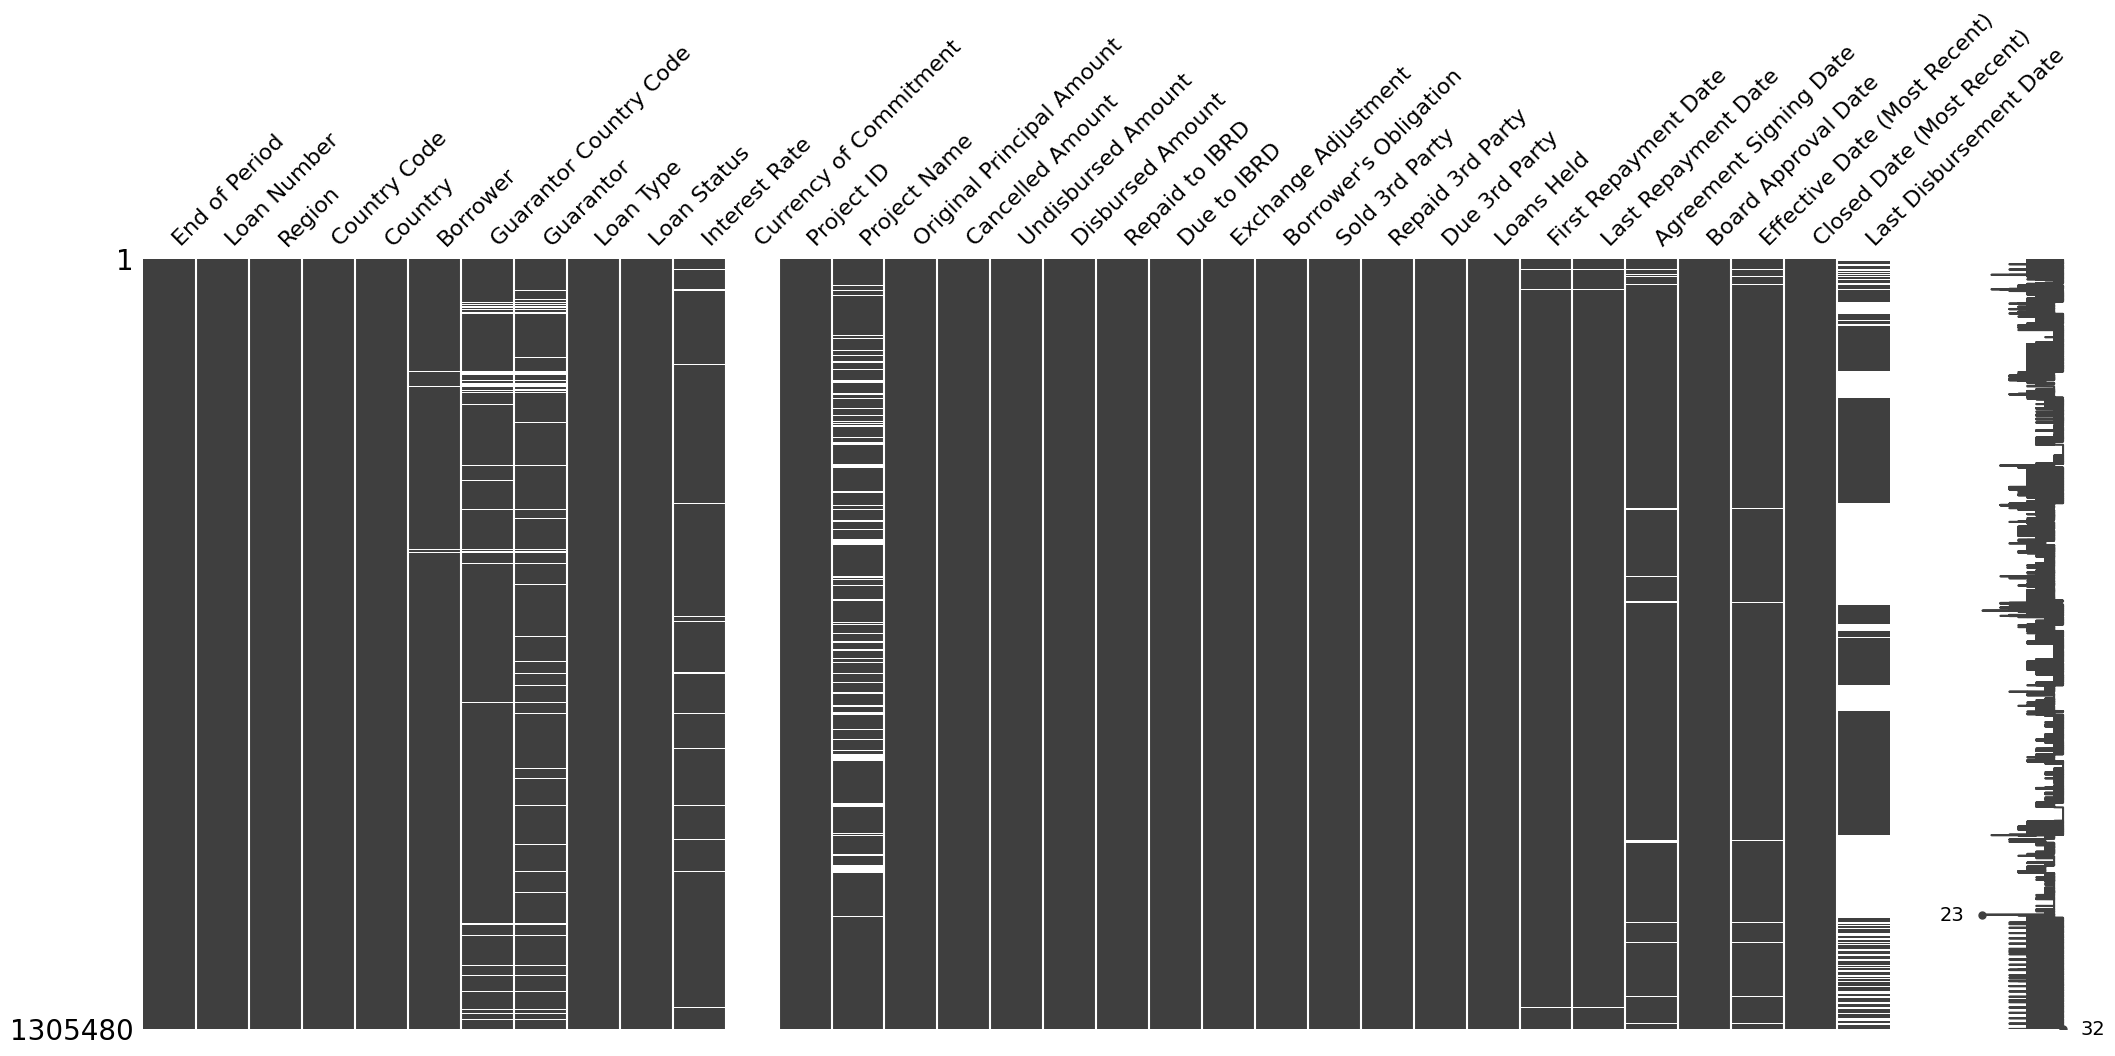

In [9]:
# Phân bố dữ liệu
msno.matrix(df)
plt.show()

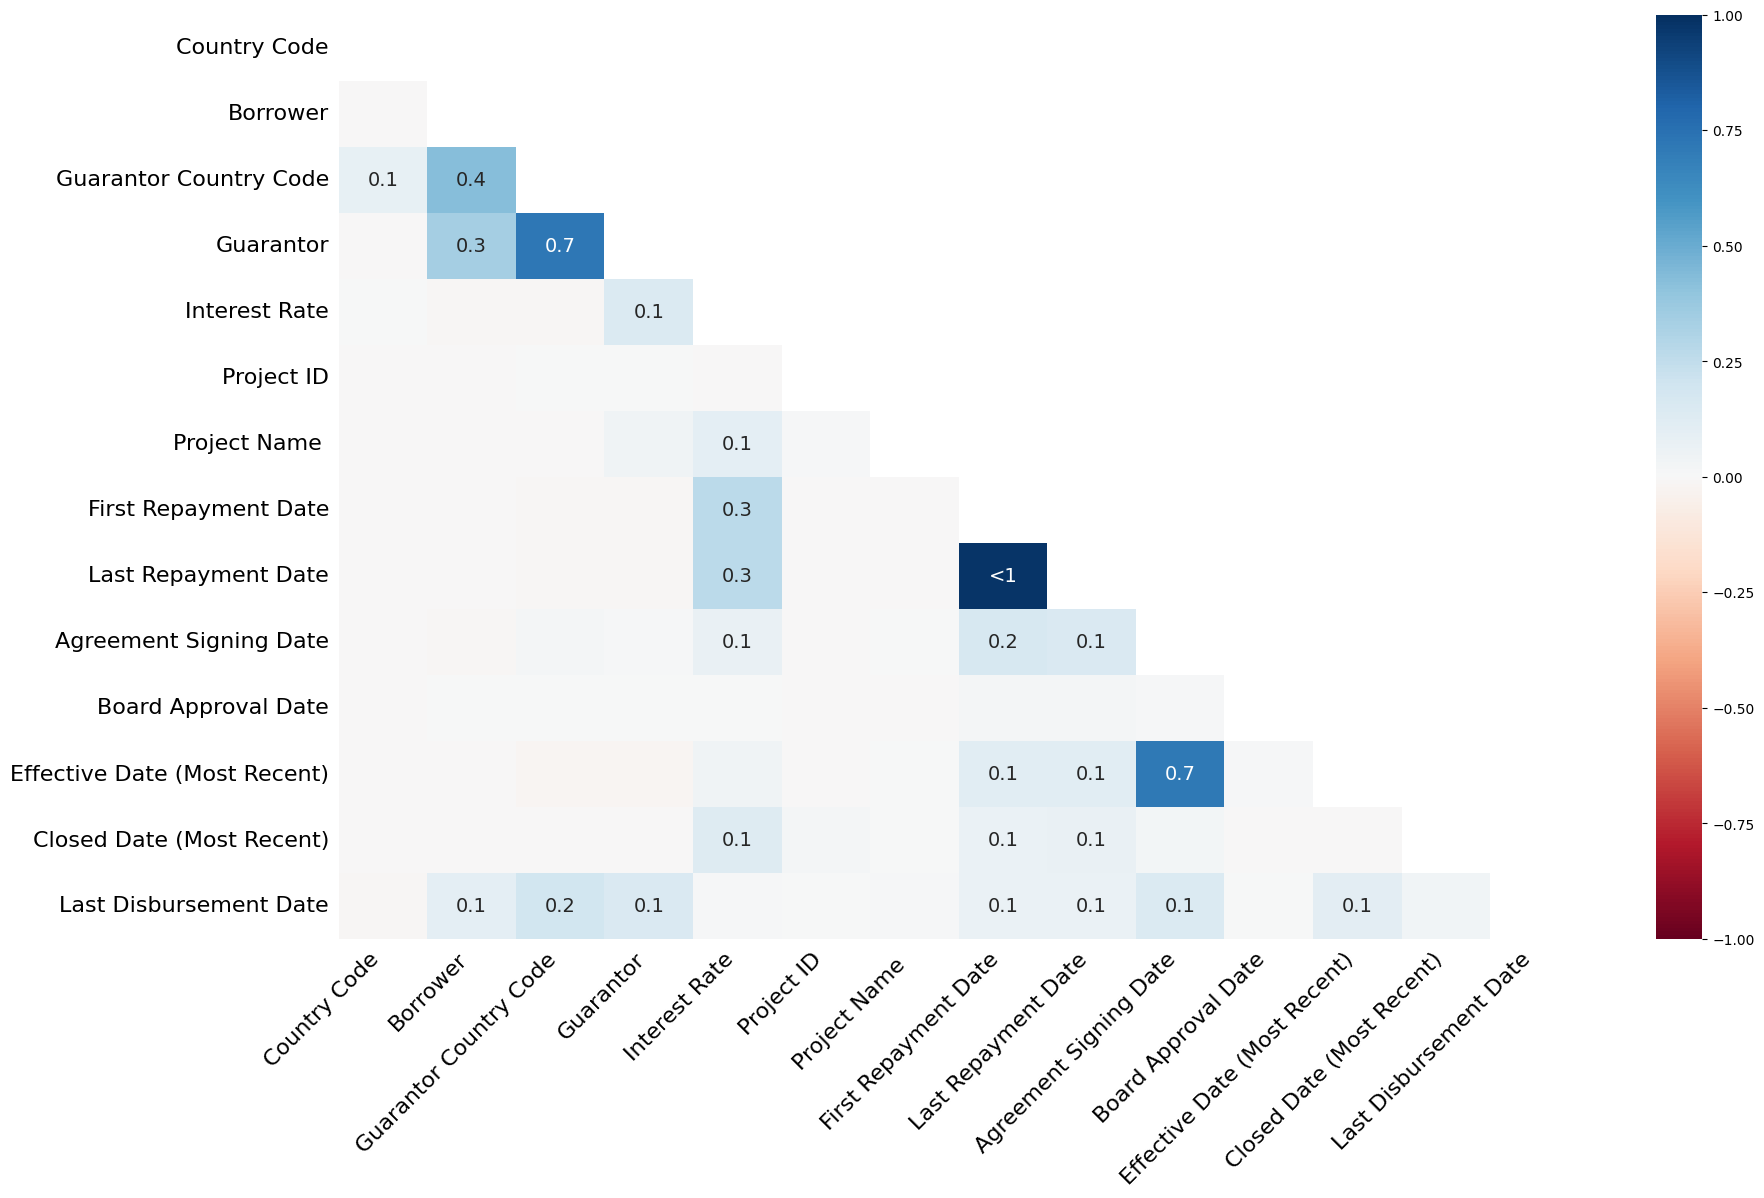

In [10]:
# Vẽ correlation= missing value của các cột thành heatmap
msno.heatmap(df)
plt.show()

In [11]:
df1 = df.drop(columns='Currency of Commitment').rename(columns=lambda x: x.replace(' ', '_'))
df1.columns

Index(['End_of_Period', 'Loan_Number', 'Region', 'Country_Code', 'Country',
       'Borrower', 'Guarantor_Country_Code', 'Guarantor', 'Loan_Type',
       'Loan_Status', 'Interest_Rate', 'Project_ID', 'Project_Name_',
       'Original_Principal_Amount', 'Cancelled_Amount', 'Undisbursed_Amount',
       'Disbursed_Amount', 'Repaid_to_IBRD', 'Due_to_IBRD',
       'Exchange_Adjustment', 'Borrower's_Obligation', 'Sold_3rd_Party',
       'Repaid_3rd_Party', 'Due_3rd_Party', 'Loans_Held',
       'First_Repayment_Date', 'Last_Repayment_Date', 'Agreement_Signing_Date',
       'Board_Approval_Date', 'Effective_Date_(Most_Recent)',
       'Closed_Date_(Most_Recent)', 'Last_Disbursement_Date'],
      dtype='object')

In [12]:
for col in df1.select_dtypes(np.number).columns:
    print(df1[col].duplicated().value_counts())
    print("\n")

Interest_Rate
True     1304873
False        607
Name: count, dtype: int64


Original_Principal_Amount
True     1301802
False       3678
Name: count, dtype: int64


Cancelled_Amount
True     1300709
False       4771
Name: count, dtype: int64


Undisbursed_Amount
True     1261920
False      43560
Name: count, dtype: int64


Disbursed_Amount
True     1270837
False      34643
Name: count, dtype: int64


Repaid_to_IBRD
True     1270983
False      34497
Name: count, dtype: int64


Due_to_IBRD
True     1239534
False      65946
Name: count, dtype: int64


Exchange_Adjustment
True     1252772
False      52708
Name: count, dtype: int64


Borrower's_Obligation
True     1200052
False     105428
Name: count, dtype: int64


Sold_3rd_Party
True     1304712
False        768
Name: count, dtype: int64


Repaid_3rd_Party
True     1304712
False        768
Name: count, dtype: int64


Due_3rd_Party
True     1305468
False         12
Name: count, dtype: int64


Loans_Held
True     1246111
False      59369
Nam

In [13]:
for col in df1.select_dtypes('object').columns:
    print(df1[col].duplicated().value_counts())
    print("\n")

End_of_Period
True     1305324
False        156
Name: count, dtype: int64


Loan_Number
True     1295265
False      10215
Name: count, dtype: int64


Region
True     1305468
False         12
Name: count, dtype: int64


Country_Code
True     1305333
False        147
Name: count, dtype: int64


Country
True     1305324
False        156
Name: count, dtype: int64


Borrower
True     1304323
False       1157
Name: count, dtype: int64


Guarantor_Country_Code
True     1305321
False        159
Name: count, dtype: int64


Guarantor
True     1305345
False        135
Name: count, dtype: int64


Loan_Type
True     1305461
False         19
Name: count, dtype: int64


Loan_Status
True     1305464
False         16
Name: count, dtype: int64


Project_ID
True     1298495
False       6985
Name: count, dtype: int64


Project_Name_
True     1298517
False       6963
Name: count, dtype: int64


First_Repayment_Date
True     1303392
False       2088
Name: count, dtype: int64


Last_Repayment_Date
True     1

Guarantor và Guarantor_Country_Code không trả về kết quả giống nhau

Tương tự với Country và Country_Code

In [14]:
df_num = df1.select_dtypes(np.number)
df_num.columns

Index(['Interest_Rate', 'Original_Principal_Amount', 'Cancelled_Amount',
       'Undisbursed_Amount', 'Disbursed_Amount', 'Repaid_to_IBRD',
       'Due_to_IBRD', 'Exchange_Adjustment', 'Borrower's_Obligation',
       'Sold_3rd_Party', 'Repaid_3rd_Party', 'Due_3rd_Party', 'Loans_Held'],
      dtype='object')

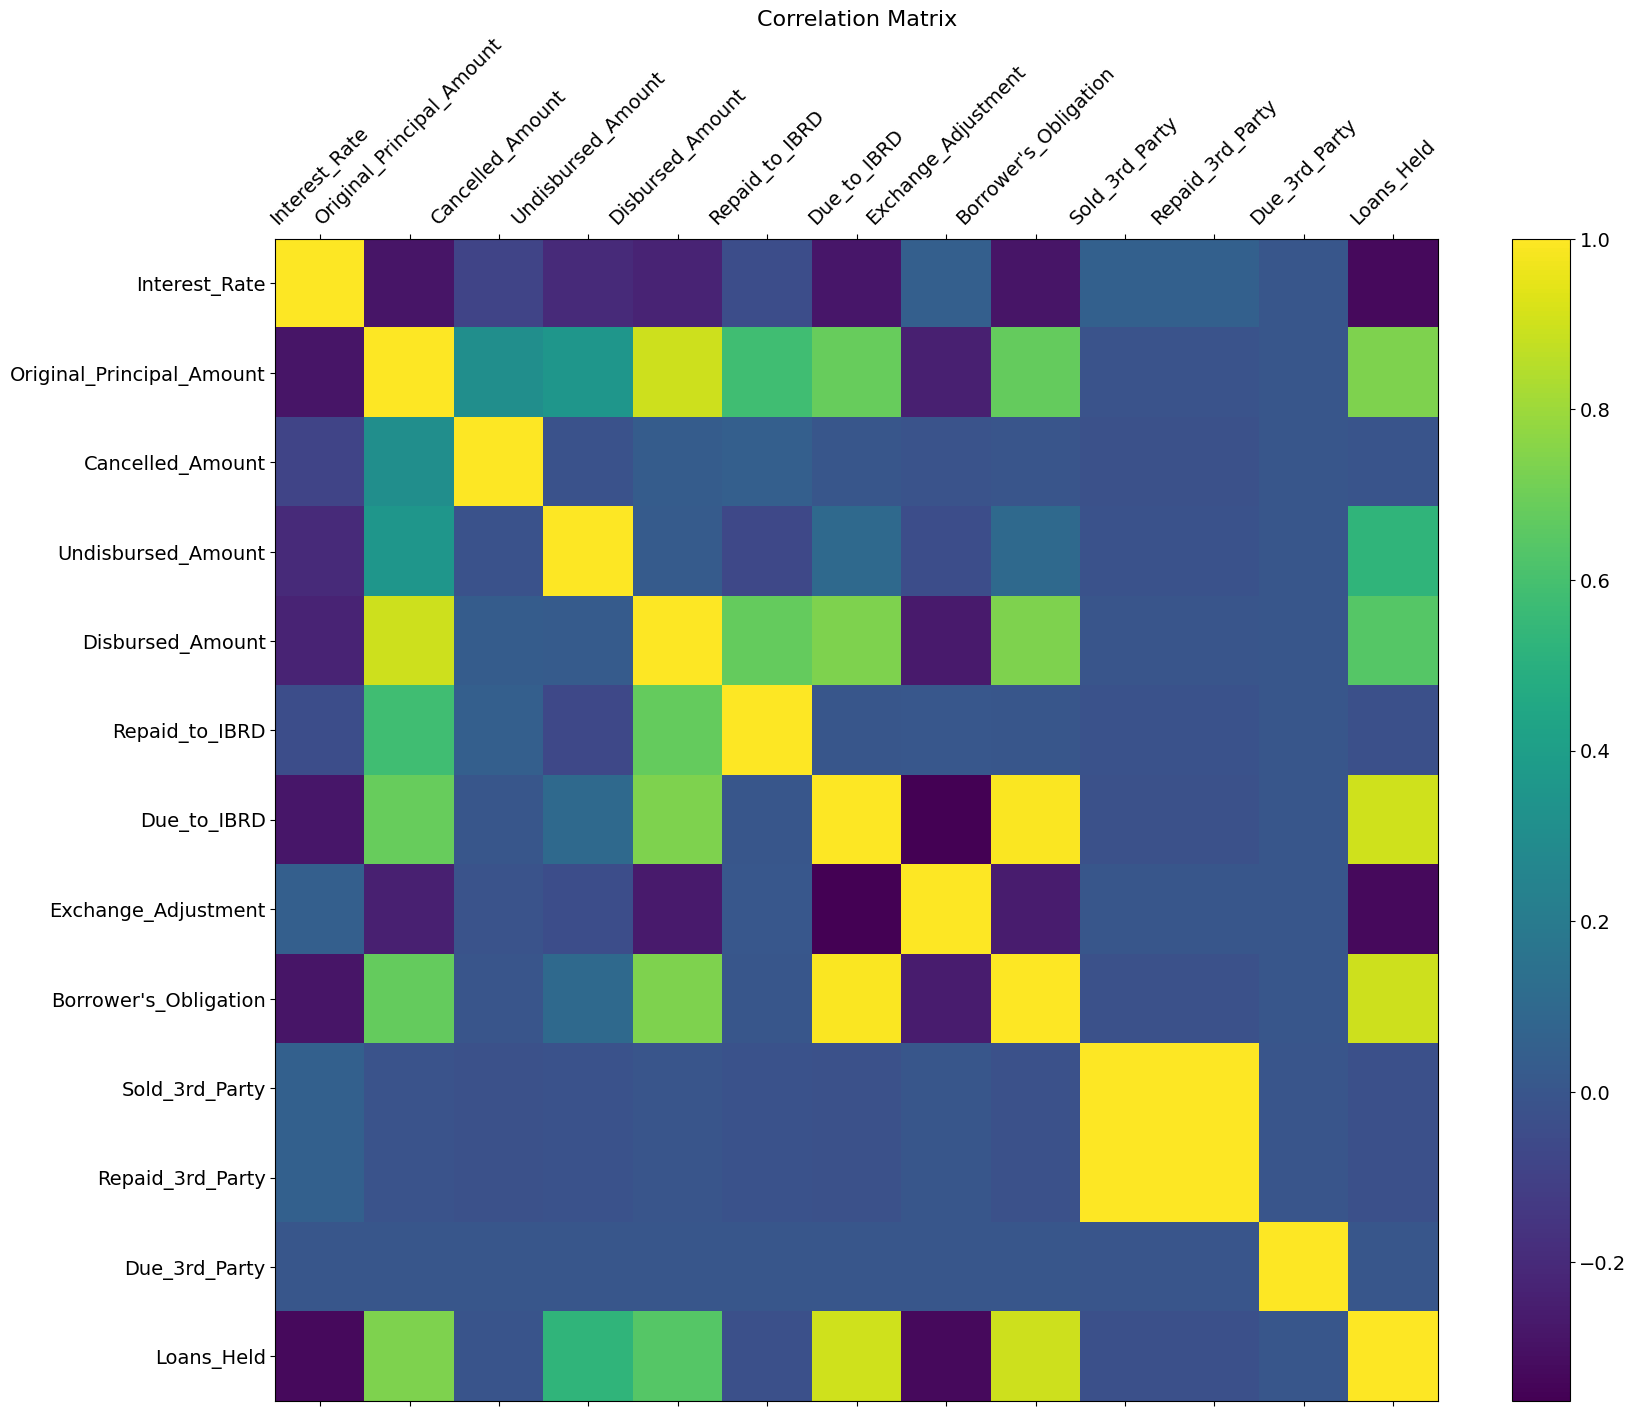

In [15]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_num.corr(), fignum=f.number)
plt.xticks(range(df_num.shape[1]), df_num.columns, fontsize=14, rotation=45)
plt.yticks(range(df_num.shape[1]), df_num.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [16]:
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,Interest_Rate,Original_Principal_Amount,Cancelled_Amount,Undisbursed_Amount,Disbursed_Amount,Repaid_to_IBRD,Due_to_IBRD,Exchange_Adjustment,Borrower's_Obligation,Sold_3rd_Party,Repaid_3rd_Party,Due_3rd_Party,Loans_Held
Interest_Rate,1.000000,-0.288004,-0.080668,-0.198619,-0.229409,-0.038747,-0.280723,0.049883,-0.285325,0.055597,0.055597,-0.000090,-0.326523
Original_Principal_Amount,-0.288004,1.000000,0.309328,0.352801,0.894890,0.583059,0.680968,-0.245514,0.677075,-0.016070,-0.016070,-0.000047,0.736269
Cancelled_Amount,-0.080668,0.309328,1.000000,-0.020508,0.031999,0.048028,0.000175,-0.014803,-0.001550,-0.023215,-0.023215,0.000091,-0.008877
Undisbursed_Amount,-0.198619,0.352801,-0.020508,1.000000,0.030905,-0.067416,0.104333,-0.039668,0.103496,-0.018042,-0.018042,0.000084,0.529183
Disbursed_Amount,-0.229409,0.894890,0.031999,0.030905,1.000000,0.676306,0.737701,-0.262196,0.733926,-0.003502,-0.003502,-0.000124,0.642984
Repaid_to_IBRD,-0.038747,0.583059,0.048028,-0.067416,0.676306,1.000000,0.002696,0.007044,0.003619,-0.019311,-0.019311,-0.000143,-0.027374
Due_to_IBRD,-0.280723,0.680968,0.000175,0.104333,0.737701,0.002696,1.000000,-0.362618,0.994041,-0.025740,-0.025740,0.000120,0.899088
Exchange_Adjustment,0.049883,-0.245514,-0.014803,-0.039668,-0.262196,0.007044,-0.362618,1.000000,-0.258867,0.004037,0.004037,-0.000018,-0.326833
Borrower's_Obligation,-0.285325,0.677075,-0.001550,0.103496,0.733926,0.003619,0.994041,-0.258867,1.000000,-0.026206,-0.026206,0.000122,0.893636
Sold_3rd_Party,0.055597,-0.016070,-0.023215,-0.018042,-0.003502,-0.019311,-0.025740,0.004037,-0.026206,1.000000,1.000000,-0.004072,-0.029902


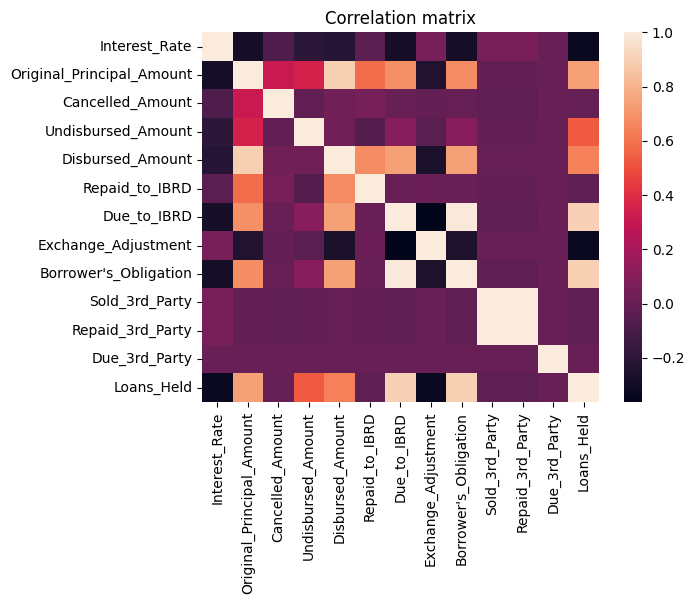

In [17]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title("Correlation matrix")
plt.show()

In [ ]:
sns.histplot(df, x="petal_width", hue="class")

In [28]:
categorical_feats = [
    f for f in df1.columns if df1[f].dtype == 'object'
]

categorical_feats
for f_ in categorical_feats:
    df1[f_], _ = pd.factorize(df1[f_])
    df1[f_] = df1[f_].astype('category')

In [38]:
def get_null_importance(data, shuffle, n_iterations=10, seed=None):
    # Gather real features
    train_features = [f for f in data if f != 'Loans_Held']
    
    # Shuffle target if required
    y = data['Loans_Held'].copy()
    if shuffle:
        y = data['Loans_Held'].copy().sample(frac=1.0)
    
    # Initialize arrays to store null importances
    null_importances_gain = np.zeros((n_iterations, len(train_features)))
    null_importances_split = np.zeros((n_iterations, len(train_features)))
    
    # Fit LightGBM model for each iteration
    for i in range(n_iterations):
        # Shuffle the target
        y_shuffled = y.sample(frac=1.0, random_state=seed if seed is None else seed+i)
        
        # Fit LightGBM model
        dtrain = lgb.Dataset(data[train_features], y_shuffled, free_raw_data=False)
        lgb_params = {
            'objective': 'binary',
            'boosting_type': 'rf',
            'subsample': 0.623,
            'colsample_bytree': 0.7,
            'num_leaves': 127,
            'max_depth': 8,
            'seed': seed,
            'bagging_freq': 1,
            'n_jobs': 4
        }
        clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200, categorical_feature=categorical_feats)
        
        # Get feature importances for this iteration
        null_importances_gain[i, :] = clf.feature_importance(importance_type='gain')
        null_importances_split[i, :] = clf.feature_importance(importance_type='split')
    
    # Compute average feature importances
    average_importances_gain = null_importances_gain.mean(axis=0)
    average_importances_split = null_importances_split.mean(axis=0)
    
    # Create DataFrame to store importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = train_features
    imp_df["importance_gain"] = average_importances_gain
    imp_df["importance_split"] = average_importances_split
    imp_df['trn_score'] = mean_squared_error(y, clf.predict(data[train_features]))
    
    return imp_df

In [39]:
actual_imp_df = get_null_importance(data=df1, shuffle=False)

[LightGBM] [Info] Number of positive: 310789, number of negative: 994691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6364
[LightGBM] [Info] Number of data points in the train set: 1305480, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238065 -> initscore=-1.163318
[LightGBM] [Info] Start training from score -1.163318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [40]:
actual_imp_df.head()

,feature,importance_gain,importance_split,trn_score
0,End_of_Period,18305.343546,3291.6,1.476292e+16
1,Loan_Number,4058.823363,672.1,1.476292e+16
2,Region,2527.481382,447.4,1.476292e+16
3,Country_Code,4697.079086,769.1,1.476292e+16
4,Country,3192.888464,501.4,1.476292e+16


In [42]:
null_imp_df = pd.DataFrame()
nb_runs = 10
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    # Get current run importances
    imp_df = get_null_importance(data=df1, shuffle=True)
    imp_df['run'] = i + 1 
    # Concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    # Erase previous message
    for l in range(len(dsp)):
        print('\b', end='', flush=True)
    # Display current run and time used
    spent = (time.time() - start) / 60
    dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
    print(dsp, end='', flush=True)

[LightGBM] [Info] Number of positive: 310789, number of negative: 994691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6364
[LightGBM] [Info] Number of data points in the train set: 1305480, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238065 -> initscore=-1.163318
[LightGBM] [Info] Start training from score -1.163318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [53]:
null_imp_df.head(40)

,feature,importance_gain,importance_split,trn_score,run
0,End_of_Period,17242.256690,3216.3,1.476292e+16,1
1,Loan_Number,3750.453866,641.8,1.476292e+16,1
2,Region,2533.599504,449.2,1.476292e+16,1
3,Country_Code,4526.001636,740.7,1.476292e+16,1
4,Country,3067.360559,482.7,1.476292e+16,1
5,Borrower,6291.821234,1046.7,1.476292e+16,1
6,Guarantor_Country_Code,3875.031431,596.8,1.476292e+16,1
7,Guarantor,3208.896537,526.9,1.476292e+16,1
8,Loan_Type,1701.415304,342.5,1.476292e+16,1
9,Loan_Status,1947.083556,408.1,1.476292e+16,1


In [47]:
def display_distributions(actual_imp_df_, null_imp_df_, feature_):
    plt.figure(figsize=(13, 6))
    gs = gridspec.GridSpec(1, 2)
    # Plot Split importances
    ax = plt.subplot(gs[0, 0])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_split'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_split'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Split Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (split) Distribution for %s ' % feature_.upper())
    # Plot Gain importances
    ax = plt.subplot(gs[0, 1])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_gain'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Gain Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (gain) Distribution for %s ' % feature_.upper())

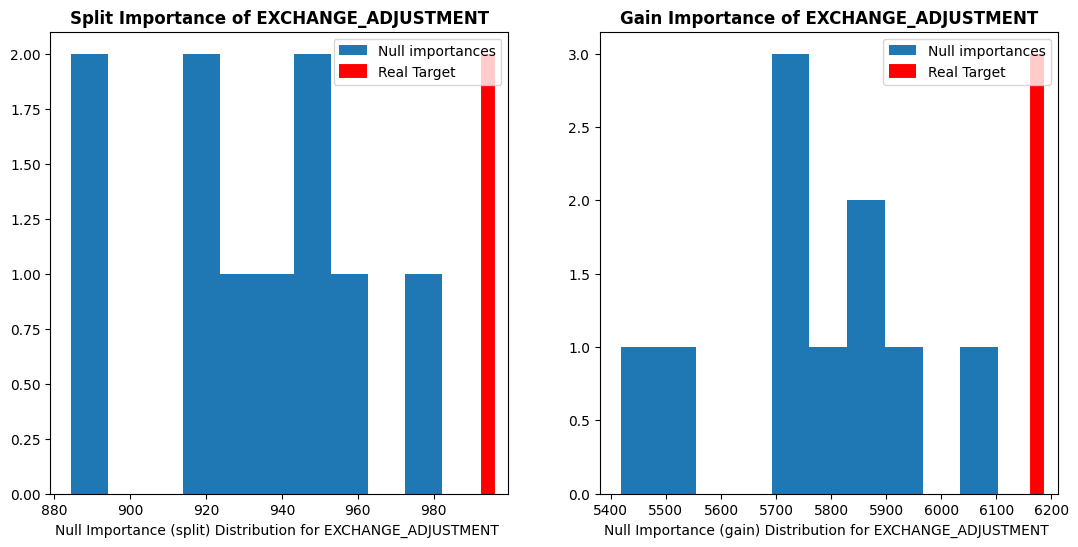

In [54]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='Exchange_Adjustment')

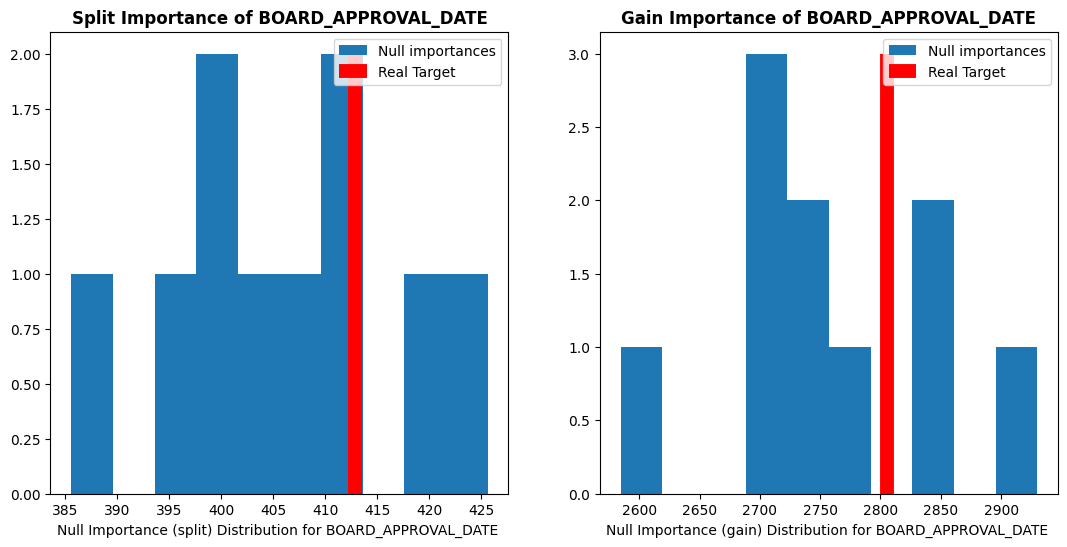

In [56]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='Board_Approval_Date')

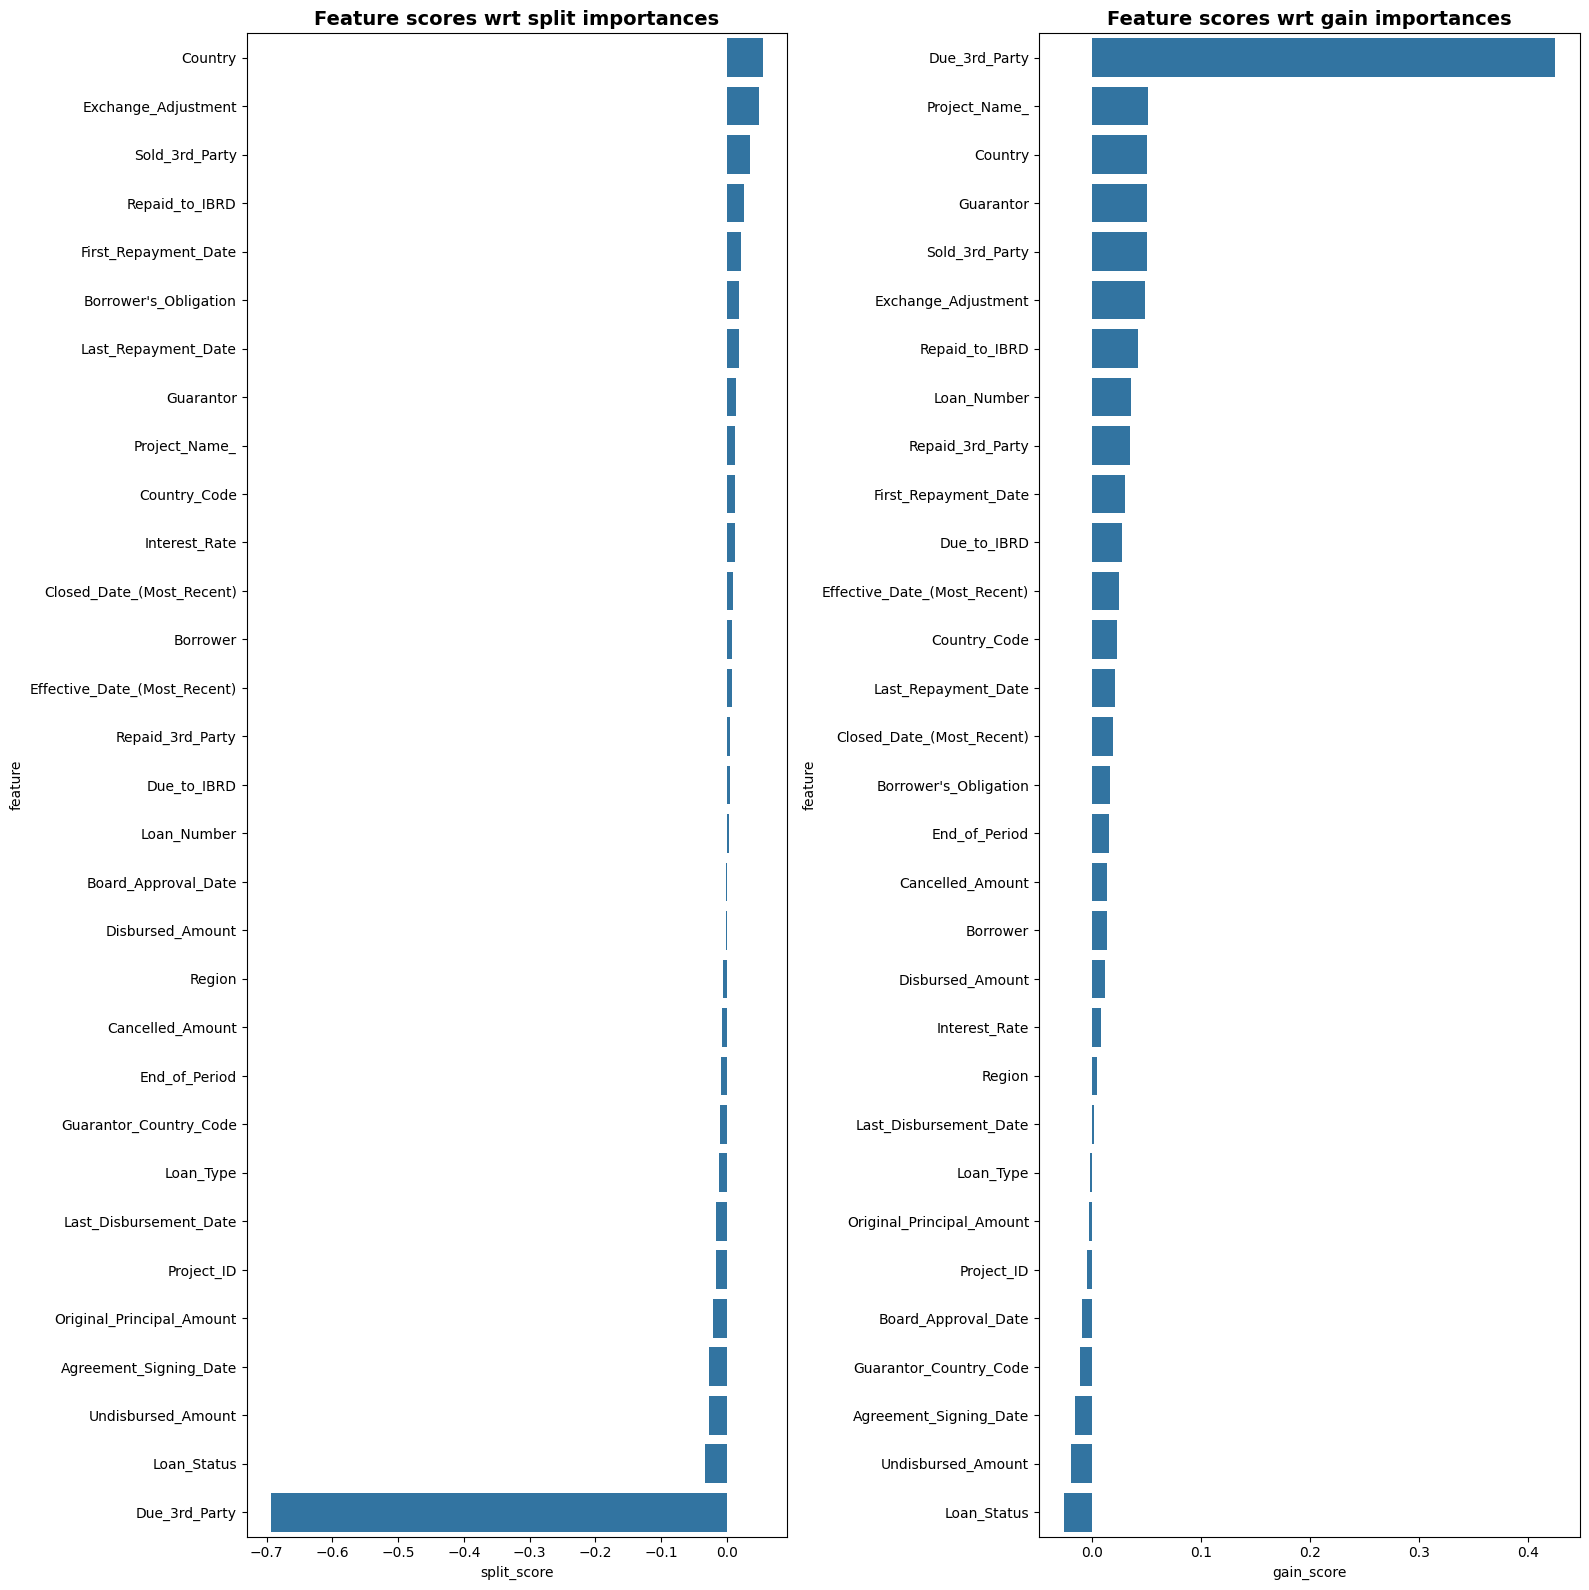

In [57]:
feature_scores = []
for _f in actual_imp_df['feature'].unique():
    f_null_imps_gain = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps_gain = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_gain'].mean()
    gain_score = np.log(1e-10 + f_act_imps_gain / (1 + np.percentile(f_null_imps_gain, 75)))  # Avoid didvide by zero
    f_null_imps_split = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
    f_act_imps_split = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_split'].mean()
    split_score = np.log(1e-10 + f_act_imps_split / (1 + np.percentile(f_null_imps_split, 75)))  # Avoid didvide by zero
    feature_scores.append((_f, split_score, gain_score))

scores_df = pd.DataFrame(feature_scores, columns=['feature', 'split_score', 'gain_score'])

plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()

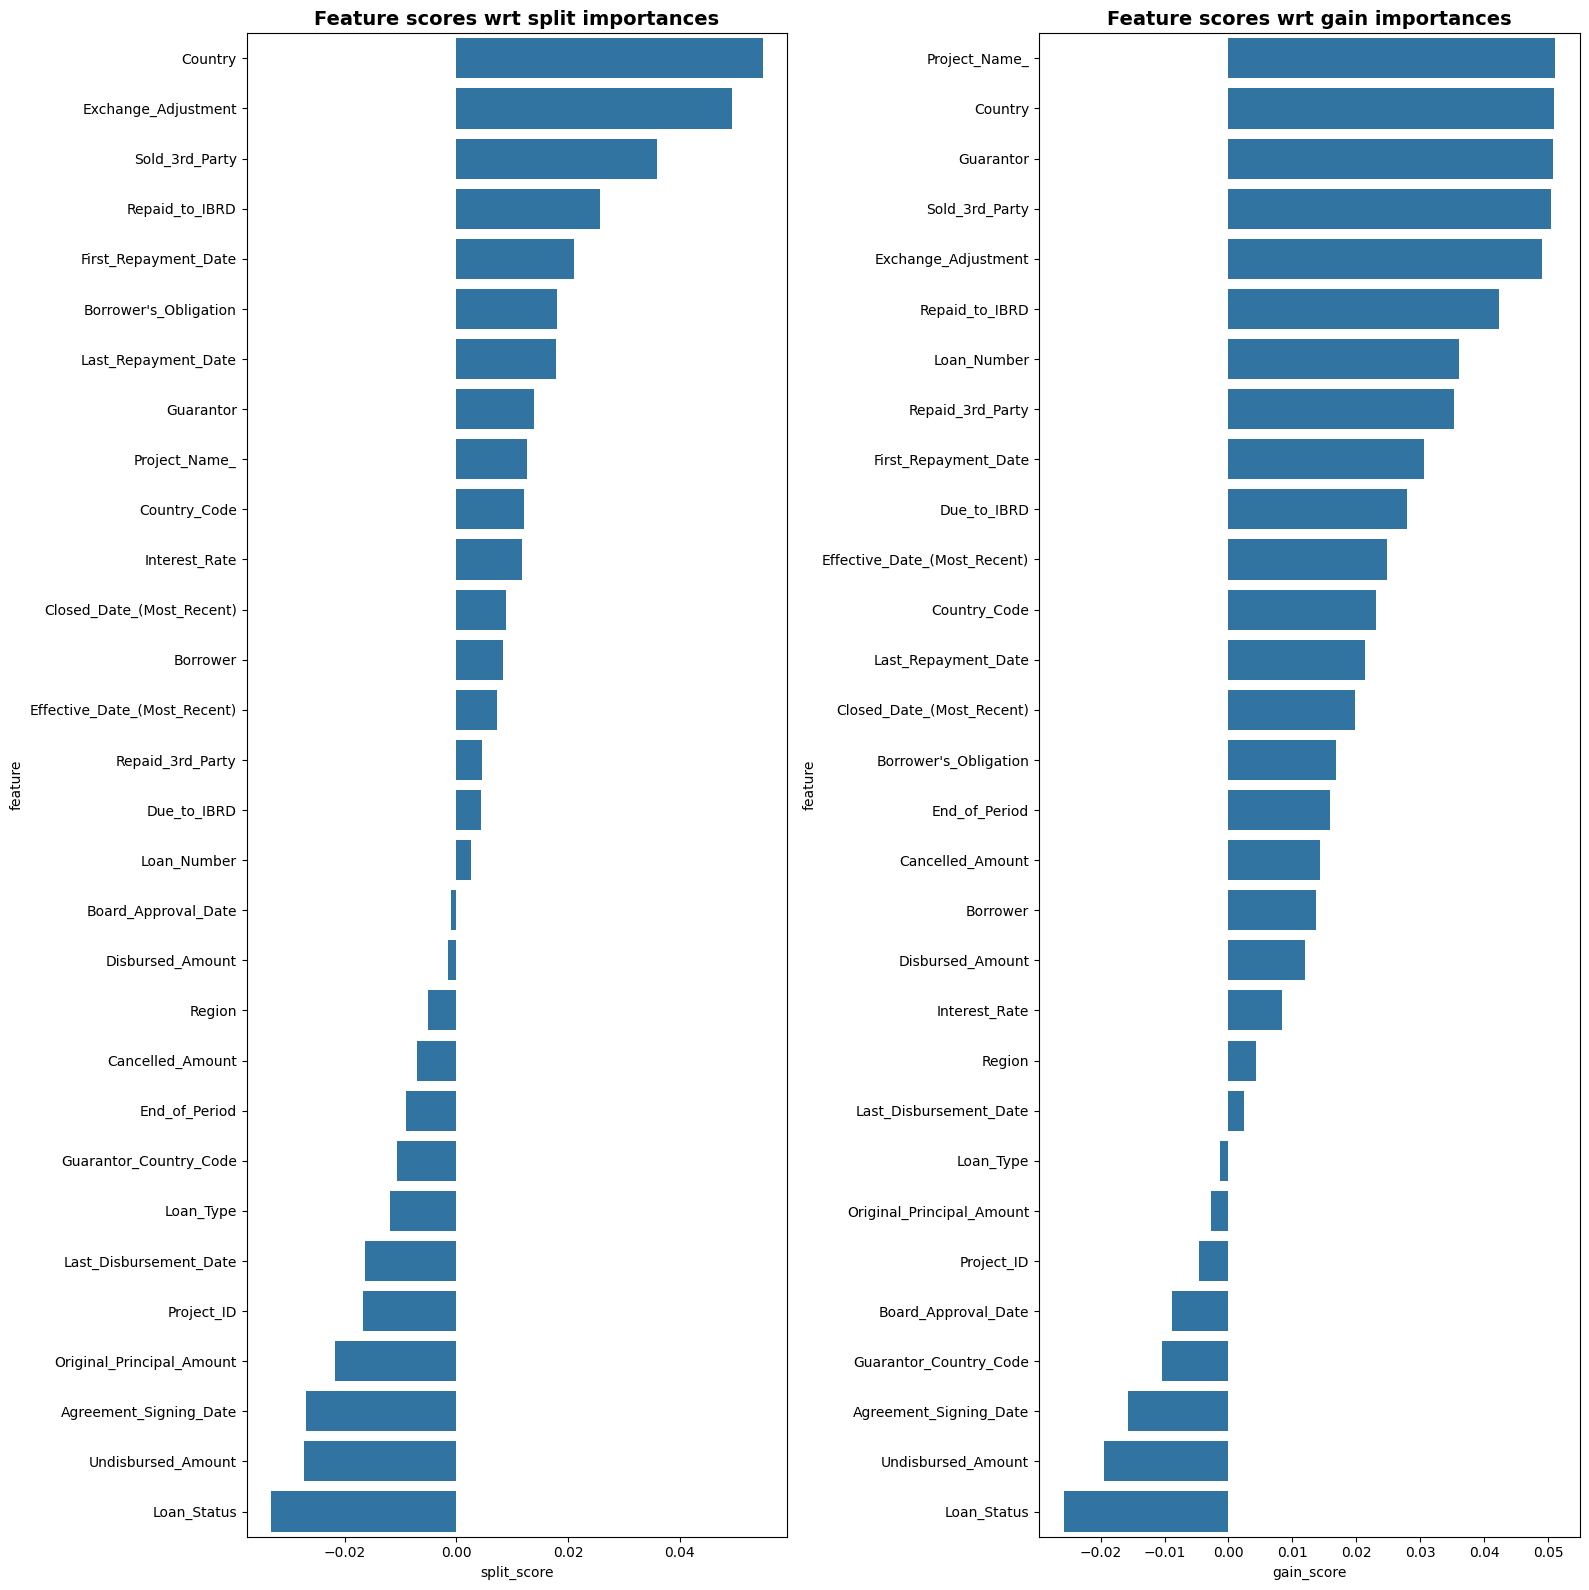

In [58]:
feature_scores = []
for _f in actual_imp_df['feature'].unique():
    f_null_imps_gain = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps_gain = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_gain'].mean()
    gain_score = np.log(1e-10 + f_act_imps_gain / (1 + np.percentile(f_null_imps_gain, 75)))  # Avoid didvide by zero
    f_null_imps_split = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
    f_act_imps_split = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_split'].mean()
    split_score = np.log(1e-10 + f_act_imps_split / (1 + np.percentile(f_null_imps_split, 75)))  # Avoid didvide by zero
    feature_scores.append((_f, split_score, gain_score))
    feature_scores = [_f for _f in feature_scores if _f[0] != 'Due_3rd_Party']
scores_df = pd.DataFrame(feature_scores, columns=['feature', 'split_score', 'gain_score'])

plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()